Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory us

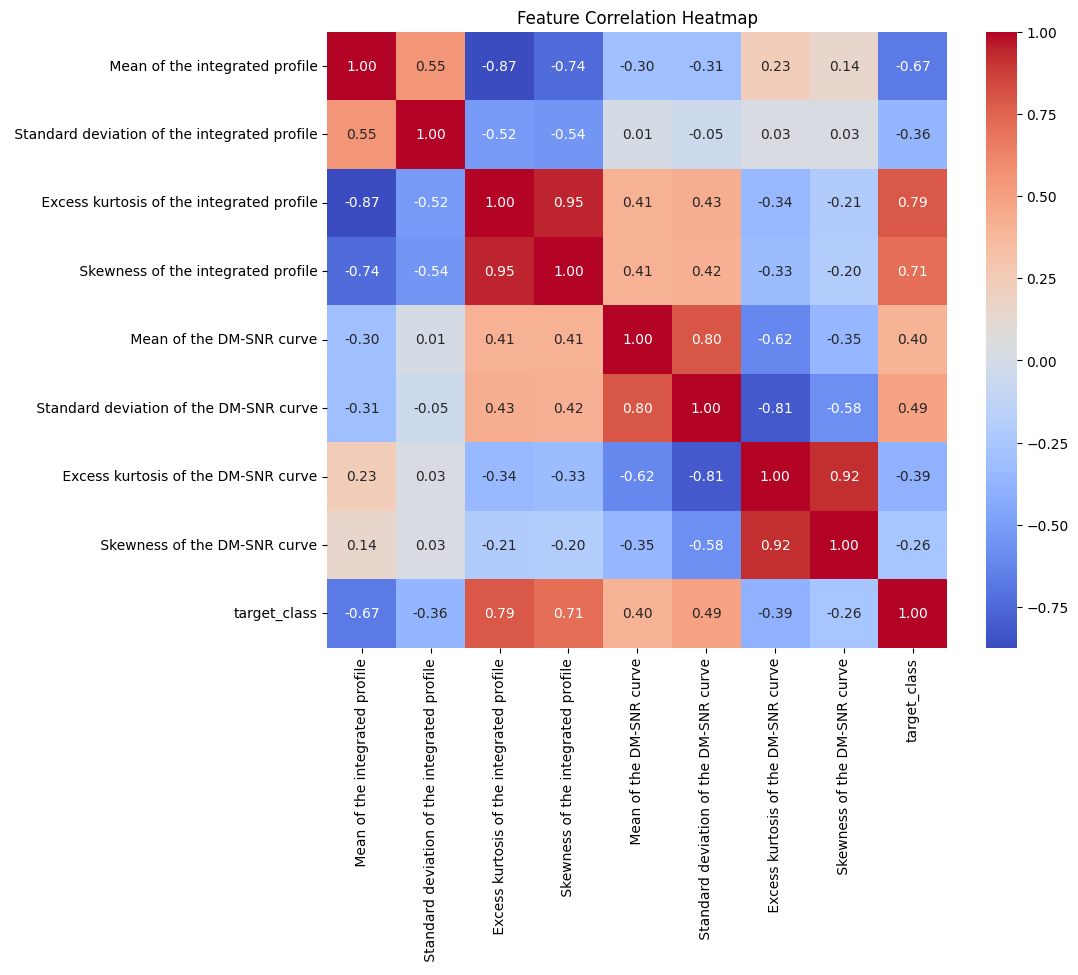

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "pulsar_stars.csv"  # Replace with your dataset file name
data = pd.read_csv(file_path)

# Display dataset overview
print("Dataset Overview:")
print(data.info())

# Check class balance
print("\nClass Balance:")
print(data['target_class'].value_counts())

# Feature correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


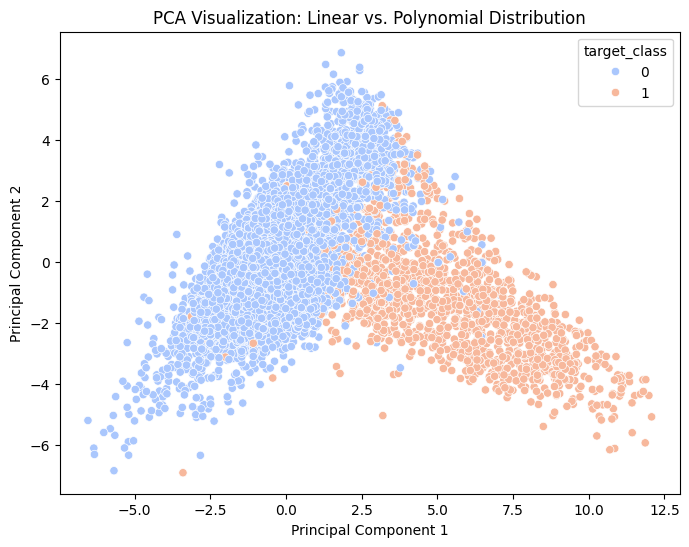

If data points of different classes form a clear linear boundary in the PCA plot, the data is likely linearly separable.


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = data.iloc[:, :-1]
y = data['target_class']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['target_class'] = y

# Scatter plot of PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='target_class', data=pca_df, palette='coolwarm')
plt.title("PCA Visualization: Linear vs. Polynomial Distribution")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Training and testing sets prepared.")


Training and testing sets prepared.


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# SVM Kernels
kernels = ['default', 'linear', 'poly', 'sigmoid']
results = {}

# Default SVM
default_svm = SVC(random_state=42)
default_svm.fit(X_train, y_train)
default_pred = default_svm.predict(X_test)
results['default'] = accuracy_score(y_test, default_pred)

# Linear kernel
linear_svm = SVC(kernel='linear', random_state=42)
linear_svm.fit(X_train, y_train)
linear_pred = linear_svm.predict(X_test)
results['linear'] = accuracy_score(y_test, linear_pred)

# Polynomial kernel
poly_svm = SVC(kernel='poly', degree=3, random_state=42)
poly_svm.fit(X_train, y_train)
poly_pred = poly_svm.predict(X_test)
results['polynomial'] = accuracy_score(y_test, poly_pred)

# Sigmoid kernel
sigmoid_svm = SVC(kernel='sigmoid', random_state=42)
sigmoid_svm.fit(X_train, y_train)
sigmoid_pred = sigmoid_svm.predict(X_test)
results['sigmoid'] = accuracy_score(y_test, sigmoid_pred)

# Print results
print("SVM Results:")
for kernel, acc in results.items():
    print(f"{kernel} kernel accuracy: {acc:.4f}")

# Classification Report for default kernel
print("\nClassification Report (Default Kernel):")
print(classification_report(y_test, default_pred))


SVM Results:
default kernel accuracy: 0.9807
linear kernel accuracy: 0.9799
polynomial kernel accuracy: 0.9779
sigmoid kernel accuracy: 0.8777

Classification Report (Default Kernel):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3252
           1       0.95      0.84      0.89       328

    accuracy                           0.98      3580
   macro avg       0.97      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



In [ ]:
# Classification Report for LINEAR kerneL
print("\nClassification Report (linear):")
print(classification_report(y_test,linear_pred))



Classification Report (linear):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3252
           1       0.96      0.82      0.88       328

    accuracy                           0.98      3580
   macro avg       0.97      0.91      0.94      3580
weighted avg       0.98      0.98      0.98      3580



In [ ]:
# Classification Report for polynomial kernel
print("\nClassification Report (polynomial):")
print(classification_report(y_test,poly_pred))


Classification Report (polynomial):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3252
           1       0.94      0.81      0.87       328

    accuracy                           0.98      3580
   macro avg       0.96      0.90      0.93      3580
weighted avg       0.98      0.98      0.98      3580



In [ ]:
# Classification Report for Sigmoid kernel
print("\nClassification Report (Sigmoid):")
print(classification_report(y_test,sigmoid_pred))


Classification Report (Sigmoid):
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      3252
           1       0.32      0.31      0.32       328

    accuracy                           0.88      3580
   macro avg       0.63      0.62      0.62      3580
weighted avg       0.87      0.88      0.88      3580



In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# GridSearchCV
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters and accuracy
print("\nBest Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
best_pred = best_model.predict(X_test)

print("\nTest Accuracy of Best Model:", accuracy_score(y_test, best_pred))
print("\nClassification Report of Best Model:")
print(classification_report(y_test, best_pred))



Best Hyperparameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validated Accuracy: 0.9796758683804347

Test Accuracy of Best Model: 0.9810055865921787

Classification Report of Best Model:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3252
           1       0.94      0.85      0.89       328

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580

